#### COMPANION WORKBOOK

# Classification Algorithms

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Binary Classification

#### First, let's import the libraries that we'll need (again, we purposely left this blank to allow you to practice this for yourself).
* If you forget a library, you can always add it later and re-run this code cell.

In [1]:
# NumPy and Pandas
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib, and remember to display plots in the notebook
from matplotlib import pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('hr_analytical_base_table.csv')
df.head()

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.000,0.933,4,0.000,0.830,1,5.000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.000,0.000,3,0.000,0.835,0,2.000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.000,0.789,3,0.000,0.835,0,3.000,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.000,0.576,4,0.000,0.425,0,2.000,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.000,0.845,3,0.000,0.779,0,3.000,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [3]:
raw_df = pd.read_csv('employee_data.csv')
print( raw_df.status.unique())

['Left' 'Employed']


In [4]:
raw_df.status.head()

0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

In [5]:
abt_df = pd.read_csv('hr_analytical_base_table.csv')
print (abt_df.status.unique())
abt_df.status.head()

[1 0]


0    1
1    0
2    0
3    0
4    0
Name: status, dtype: int64

## II. Simulation: Noisy Conditional

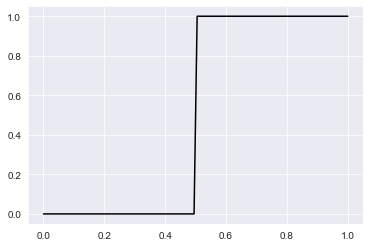

In [6]:
x = np.linspace(0, 1, 100)
plt.plot(x, x > 0.5, color='k')
plt.show()

In [7]:
x = np.linspace(0, 1, 100)
np.random.seed(555)
noise = np.random.uniform(-0.2, 0.2, 100)
y = ((x + noise) > 0.5).astype(int)

#1 evenly spaced list of 100 numbers from 0 to 1
#2 generated 100 random numbers from a uniform distribution between -0.2 and 0.2
#3 genertated 100 values for the target variable y based on noisy conditional mapping function

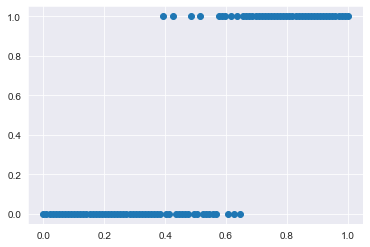

In [8]:
plt.scatter(x, y)
plt.show()

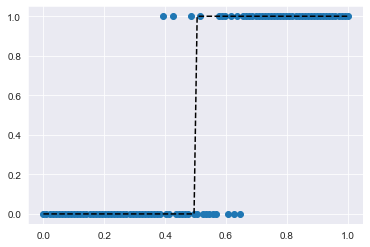

In [9]:
plt.scatter(x, y)
plt.plot(x, x > 0.5, 'k--')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression, LogisticRegression

# this inputs the linear regression function ability so we can demonstrate why it would not work here

In [11]:
x.shape

(100,)

In [12]:
X = x.reshape(100,1)

In [13]:
print( x[:5])

[0.         0.01010101 0.02020202 0.03030303 0.04040404]


In [14]:
print( X[:5])

[[0.        ]
 [0.01010101]
 [0.02020202]
 [0.03030303]
 [0.04040404]]


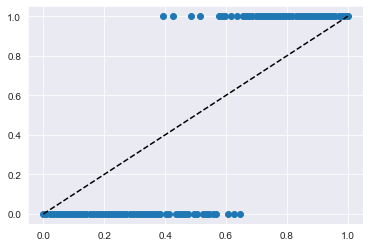

In [15]:
model = LinearRegression()
model.fit(X,x)

plt.scatter(X, y)
plt.plot(X, model.predict(X), 'k--')
plt.show()

In [16]:
# this model doesn't make sense because we want very high confidence once we pass 0.3 and 0.7, as we
# generated no noise below and above those lines in the sand

model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [17]:
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
pred = model.predict_proba(X[:10])
pred

# this gives us the probabilities of the function being classified as either employed or left

array([[0.92468588, 0.07531412],
       [0.92156528, 0.07843472],
       [0.9183268 , 0.0816732 ],
       [0.91496694, 0.08503306],
       [0.91148219, 0.08851781],
       [0.907869  , 0.092131  ],
       [0.90412385, 0.09587615],
       [0.90024318, 0.09975682],
       [0.89622347, 0.10377653],
       [0.8920612 , 0.1079388 ]])

In [19]:
pred[0]

array([0.92468588, 0.07531412])

In [20]:
pred[0][1]

# positive class probability for the first observation

0.07531411726795954

In [21]:
pred = [p[1] for p in pred]
pred

# just get the positive class for each prediction rather than the negative

[0.07531411726795954,
 0.07843472017296109,
 0.08167320318083687,
 0.08503306180877601,
 0.08851781493090476,
 0.09213099733850905,
 0.09587615160508385,
 0.09975681923256591,
 0.10377653105780488,
 0.10793879690157304]

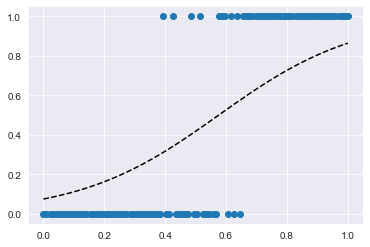

In [22]:
model = LogisticRegression()
model.fit(X, y)

pred = model.predict_proba(X)

pred = [p[1] for p in pred]

plt.scatter(X, y)
plt.plot(X, pred, 'k--')
plt.show()

# fits and plots the log-istic regression model with predicted class probabilities

## III. Logistic Regression

In [24]:
#lol skipped this :))

## IV. The Return of Model Complexity

In [25]:
def fit_and_plot_classifier(clf):
    clf.fit(X, y)
    
    pred = clf.predict_proba(X)
    pred = [p[1] for p in pred]
    
    plt.scatter(X, y)
    plt.plot(X, pred, 'k--')
    plt.show()
    
    return clf, pred

#so now we use a model that has a penalty factor added and is tunable
#L1 penalizes the absolute size of model coefficients.
#L2 penalizes the squared size of model coefficients.
# this model 1) fits any classification model 2) makes predictions 3) extracts the positive
# probabilities and 4) plots them

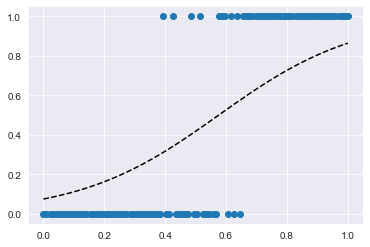

In [26]:
clf, pred = fit_and_plot_classifier(LogisticRegression())

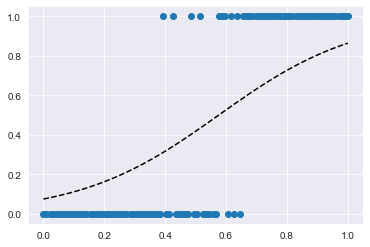

In [27]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=1))

# C is the strength of the penalty and a higher C is a weaker penalty

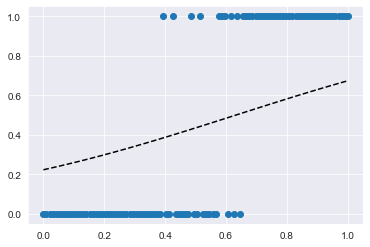

In [28]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=0.25))

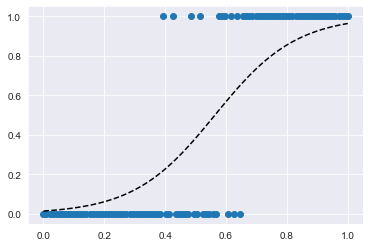

In [29]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=4))

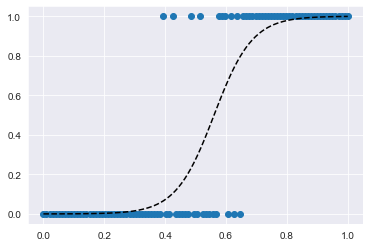

In [30]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=1000))

In [31]:
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty='l1'))

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [ ]:
l1 = LogisticRegression(penalty='l1', random_state=123)
l2 = LogisticRegression(penalty='l2', random_state=123)

In [32]:
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty='l1', C=4))

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [33]:
# rip

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 3.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, check that you've successfully generated the simulated noisy conditional dataset. Plot its scatterplot.

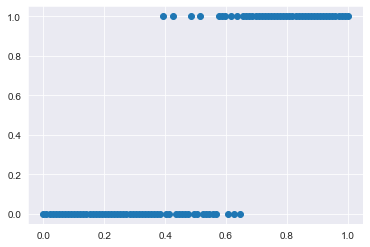

In [34]:
plt.scatter(x,y)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="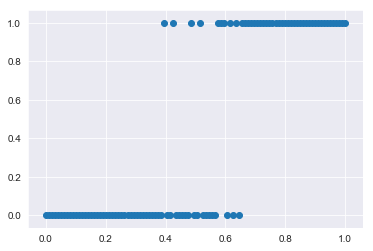&#10;">

#### B.) Next, confirm that you've reshaped in the input feature $x$ to have 2 "dimensions." Display the shape of <code>X</code>.

In [35]:
print( X.shape)

(100, 1)


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(100, 1)
</pre>

#### C.) Finally, confirm that you've correctly written a helper function to help you fit and plot classifiers. Fit and plot an L1-regularized logistic regression on the noisy conditional dataset with $C = 0.5$.
* What do you expect to see?

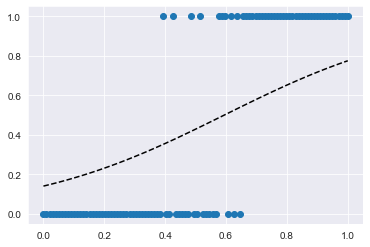

In [36]:
clf, pred = fit_and_plot_classifier(LogisticRegression(C=0.5))

## <span style="color:RoyalBlue">Exercise 3.2 - Random Forest Classifiers</span>

In the Coding Section, we took a close look at regularized logistic regression, and we looked at how varying the model complexity affects the model. Now, let's do the same thing for our first tree ensemble, the random forest.

Just to recap, random forests train a large number of "strong" decision trees and combine their predictions through bagging. In addition, there are two sources of "randomness" for random forests:
1. Each decision tree is only allowed to choose from a random subset of features to split on.
2. Each decision tree is only trained on a random subset of observations (a process called **resampling**).

#### A.) First, import the <code style="color:steelblue">RandomForestClassifier</code> algorithm from <code style="color:steelblue">sklearn.ensemble</code>.

In [37]:
from sklearn.ensemble import RandomForestClassifier

Now, we've alluded to "default" hyperparameter settings for various algorithms, but you can actually very easily see what they are for yourself.

#### B.) Simply display an *instance* of <code>RandomForestClassifier</code> where you do not pass in any arguments / settings. You should be able to see the default arguments for key hyperparameters.
* By default, how many trees are included in the random forest classifier?
* What is the default minimum leaf size?
* What is the default maximum depth?

In [38]:
RandomForestClassifier()

RandomForestClassifier()

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
</pre>

#### C.) Fit and plot a random forest with its default hyperparameter values and the random state 123.
* Is this model overfit or underfit?

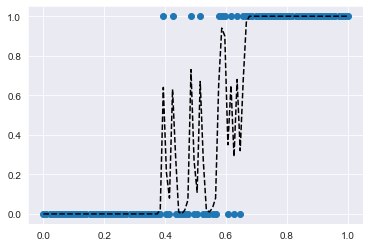

In [39]:
clf, pred = fit_and_plot_classifier(RandomForestClassifier(random_state=123))

#produces an overfit model wherein the noise is memorized by the model

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="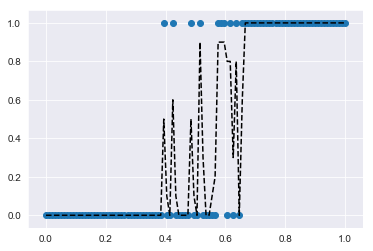&#10;">

For this simulated dataset, it's plain to see that the default random forest **suffers from overfitting**. That's not surprising because the dataset is incredibly simple, and decision trees may be too complex.

However, it's worth trying to tune the hyperparameters and overall model complexity to see if we can arrive at a better random forest.

#### D.) Let's try tuning the number of estimators included in the ensemble. Fit and plot random forests with 20, 50, 100, and 200 trees.
* For this dataset, does increasing the number of trees in the random forest help the model?

Number of Trees: 20


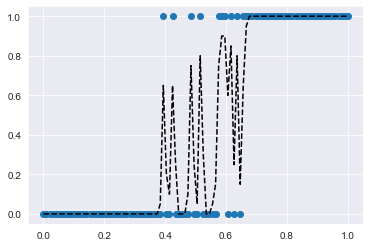

Number of Trees: 50


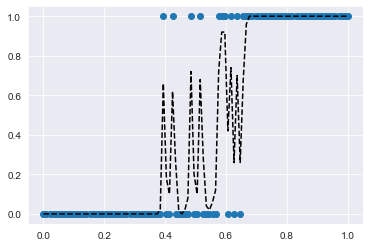

Number of Trees: 100


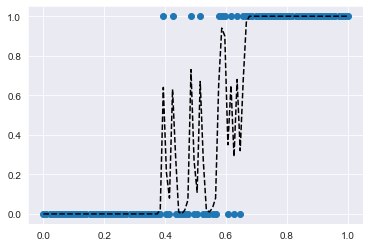

Number of Trees: 200


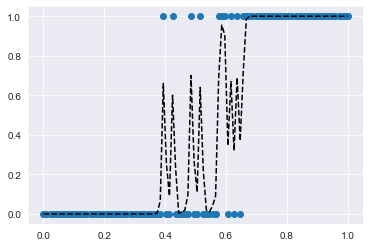

In [41]:
for n_trees in [20, 50, 100, 200]:
    print('Number of Trees:', n_trees)
    fit_and_plot_classifier(RandomForestClassifier(random_state=123,
                                                   n_estimators=n_trees))
    
    # various attempts to correct for over or underfitting

#### E.) Next, fit and plot random forests that set a higher minimum leaf size. Try minimum leaf sizes of 2, 5, 10, and 20.
* Does increasing the minimum leaf size improve the model?
* What can you conclude?

Minimum Leaf Size: 2


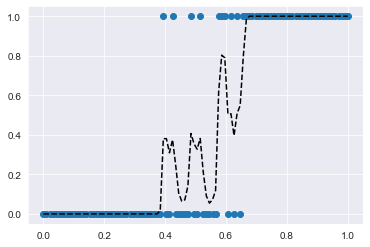

Minimum Leaf Size: 5


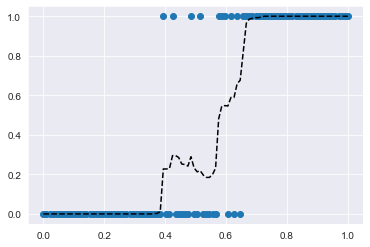

Minimum Leaf Size: 10


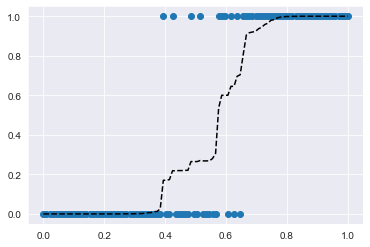

Minimum Leaf Size: 20


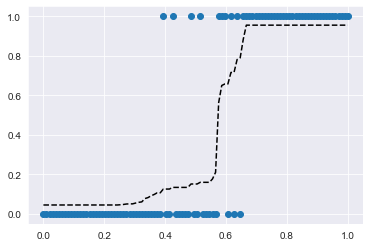

In [42]:
for leaf_size in [2, 5, 10, 20]:
    print('Minimum Leaf Size:', leaf_size)
    fit_and_plot_classifier(RandomForestClassifier(random_state=123,
                                                   min_samples_leaf=leaf_size))
    
        # various attempts to correct for over or underfitting, of all of these I like min leafsize 10

## <span style="color:RoyalBlue">Exercise 3.3 - Gradient Boosted Classifiers</span>

Next, let's repeat the same exercise for gradient boosted trees and see if tuning the hyperparameters the same way has the same effects.

Just to recap, boosted trees train a sequence of "weak", **constrained** decision trees and combine their predictions through boosting. 
* Each decision tree is allowed a **maximum depth**, which should be tuned.
* Each decision tree in the sequence tries to correct the prediction errors of the one before it.

#### A.) First, import the <code style="color:steelblue">GradientBoostingClassifier</code> algorithm from <code style="color:steelblue">sklearn.ensemble</code>.

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

#By default, the gradient boosted classifier includes 100 trees. 
#Each tree has a max depth of 3 and a minimum leaf size of 1.

#### B.) Next, display an *instance* of <code>GradientBoostingClassifier</code> where you do not pass in any arguments / settings. You should be able to see the default arguments for key hyperparameters.
* By default, how many trees are included in the gradient boosted classifier?
* What is the default minimum leaf size?
* What is the default maximum depth?

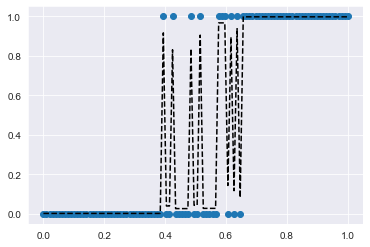

In [44]:
clf, pred = fit_and_plot_classifier(GradientBoostingClassifier(random_state=123))

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
</pre>

#### C.) Fit and plot a gradient boosted tree with its default hyperparameter values and the random state 123.
* Is this model overfit or underfit?

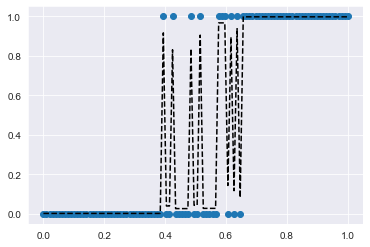

In [45]:
clf, pred = fit_and_plot_classifier(GradientBoostingClassifier(random_state=123))

<strong style="color:RoyalBlue">Expected output:</strong>

<img src="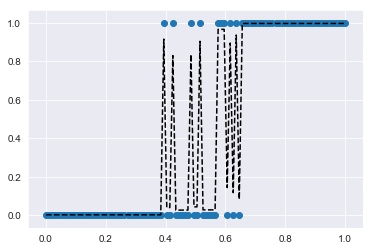&#10;">

#### D.) Let's try tuning the number of estimators included in the ensemble. Fit and plot boosted classifiers with 10, 20, 50, and 200 trees.
* For this dataset, does decreasing or increasing the number of trees in the classifier help the model?

Number of Trees: 10


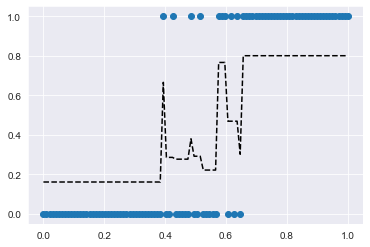

Number of Trees: 20


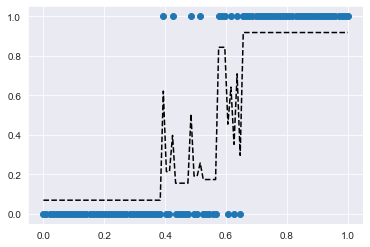

Number of Trees: 50


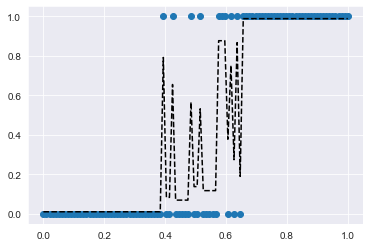

Number of Trees: 200


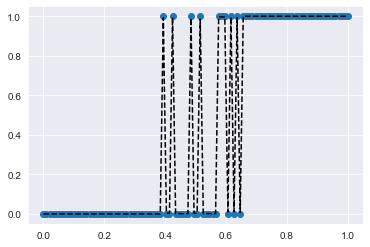

In [48]:
for n_trees in [10, 20, 50, 200]:
    print('Number of Trees:', n_trees)
    fit_and_plot_classifier(GradientBoostingClassifier(random_state=123,
                                                  n_estimators=n_trees))

#### E.) Next, fit and plot boosted trees with different max depth values. Try max depth values of 1, 2, 5, and 10.
* Does changing the max depth improve the model?
* What can you conclude?

Max Depth: 1


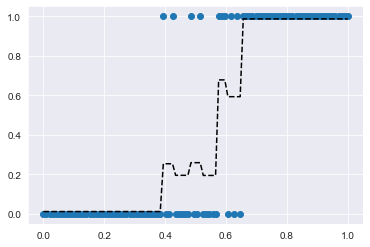

Max Depth: 2


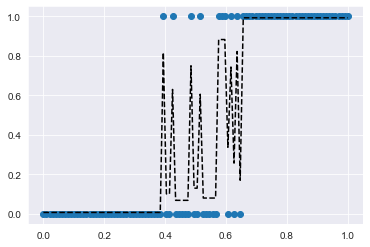

Max Depth: 5


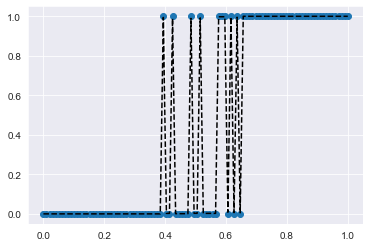

Max Depth: 10


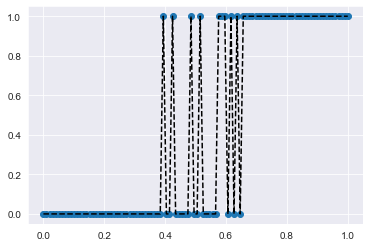

In [49]:
for depth in [1, 2, 5, 10]:
    print('Max Depth:', depth)
    fit_and_plot_classifier(GradientBoostingClassifier(random_state=123,
                                                      max_depth=depth))

Alright, that was a nice tour through some additional key theory and concepts, but let's get ready to dive back into the project! As a reminder, here are a few things you did in this module:
* You learned some key terminology for binary classification, such as "positive" vs. "negative" classes.
* You saw how logistic regression can also be regularized.
* You played around with different settings for penalty strength.
* And you recruited 4 algorithms: $L_1$-Regularized Logistic, $L_2$-Regularized Logistic, Random Forests, and Boosted Trees.

Now that we've recruited our 4 candidate algorithms, it's time to see which one performs the best! In the next module, we'll plug these algorithms into the powerful modeling process you learned in the previous project.